## import necessary library 

In [1]:
import numpy as np,pandas as pd,seaborn as sns,matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
df.shape

(30, 17)

the dataset contain 30 rows and 17 columns

The column names present in our data that is not making much sense and will need deciphering to be converted into understandable format. In order to gain understanding of different columns in dataset, following baseball stastics terminology I get from Wikipedia.

Pitching statistics:

W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work

RA – Run average: number of runs allowed times nine divided by innings pitched

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

CG – Complete game: number of games where player was the only pitcher for their team

SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he
pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win.

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

Batting statistics:

R – Runs scored: number of times a player crosses home plate

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction. The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out.

H – Hit: reaching base because of a batted, fair ball without error by the defense

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first 
base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base.

K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. It usually means the batter is out.
Base running statistics:

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.

R – Runs scored: times reached home plate legally and safely

Fielding statistics:

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

Now that we have clearer understanding on what the abbreviation mean and In order to simplify we are going to rename columns in dataset.

In [6]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## EDA steps 

In [7]:
#the steps are following
# first check the shape of the dataset
# check for the data info
# check for the null values
# check for the duplicated values
# check that there is any (?," ",-,_) vales present
# check for the describe method for descriptive stastics
# we can plot to check for the distribution of the data
# we can plot the univariate analysis,bivariate analysis and then multivarivate analysis
# check for the outliers if present then removed
# check for the skewness if present then removed
# check for the multicolinearity if present then removed
# check for the data imbalance if the given problem is classification because we can balance the data in regression problem 
# after all these steps we can move further on scaling and then on modeling

In [8]:
df.shape

(30, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

as we see there is 30 rows and 17 columns all the 17 columns contains the int64 datatype except one which contains float64 which is ERA

In [10]:
df.isnull()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# now we can sum the null values to check how many values are null

df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

as we see there is no null values in any columns

In [12]:
# now we can check for the duplicated values

df.duplicated().sum()

0

as we see there is not any duplicated values in the dataset

In [13]:
# check if there is any values contain like (?," ",-,NAN,NA,nan)
df.isin(['?'," ","-","NAN","na","NA"]).any().sum()

0

so there is not any values present which is given in this format ['?'," ","-","NAN","na","NA"]

<AxesSubplot:>

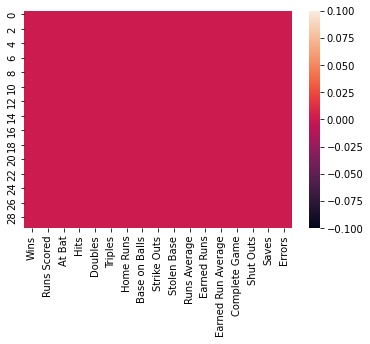

In [14]:
# now plot the heatmap to visualize the data is really clean or something is missing 

sns.heatmap(df.isnull())

as we see the dataset is absolute clean so we can further move on the next steps 

In [15]:
# descriptive stastics we can use descrbe method

In [16]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


from the above observation we get

1) from the first row count we get that all the size of the column having 30 count which means no missing data

here we get the 

2) mean value , standart devation, min ,25% ,75% 50% which is median and the maximun value

3) like we see that in some columns mean values is greator and in some columns median is greator we can further check for the skewness (if the mean is greator than median then the data is to be right skewed and if the median is greator than the mean value then the data is to be left skewed)

<AxesSubplot:>

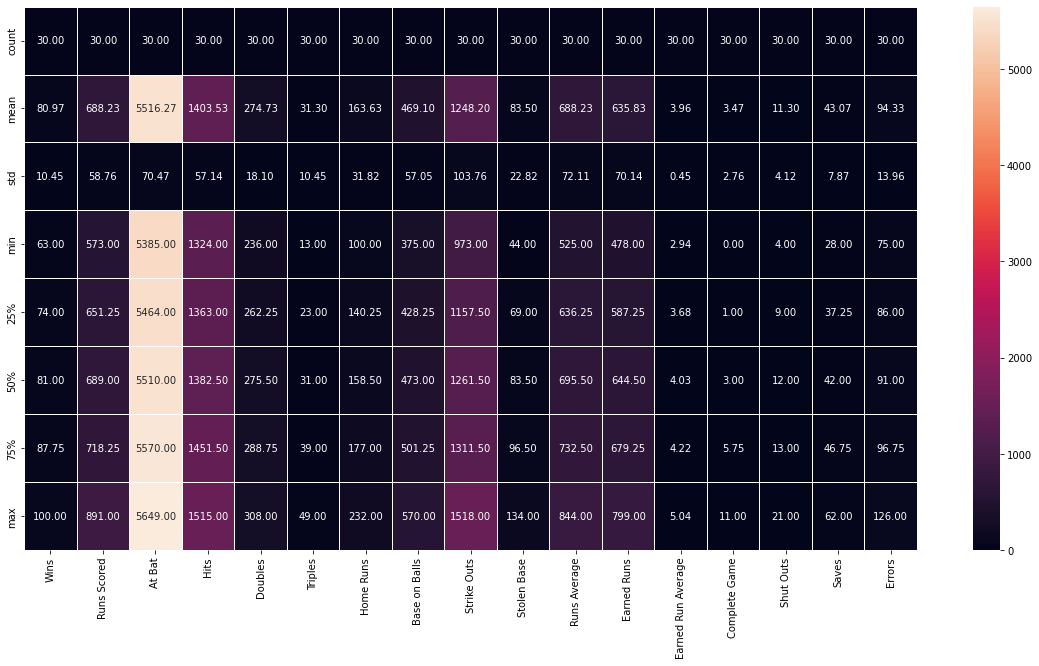

In [17]:
# now plot the stastics for this describe method
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.5)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


## ploting the data to check (univariate ,bivariate and ,multivariate analaysis)

In [19]:
# univariate analysis

df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

no we can plot the univarite with these columns

<AxesSubplot:xlabel='Wins', ylabel='count'>

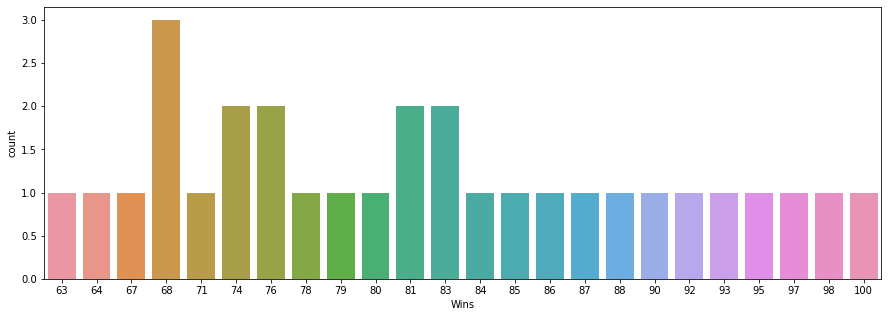

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='Wins',data=df)

as we see wins 68 having more count values and wins 74,76,83 and 81 having same count values

In [21]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<AxesSubplot:xlabel='Runs Scored', ylabel='count'>

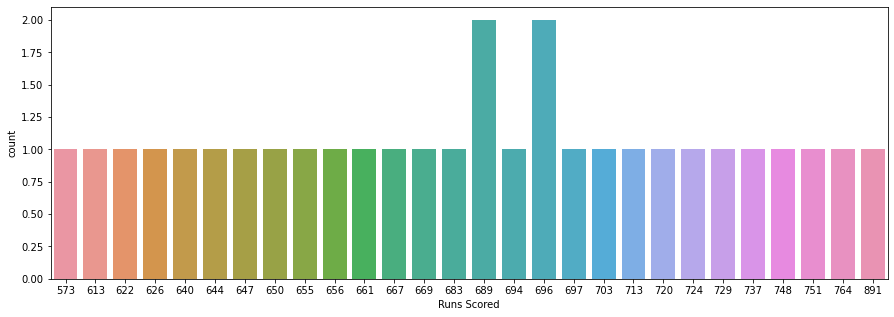

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x='Runs Scored',data=df)

<AxesSubplot:xlabel='At Bat', ylabel='count'>

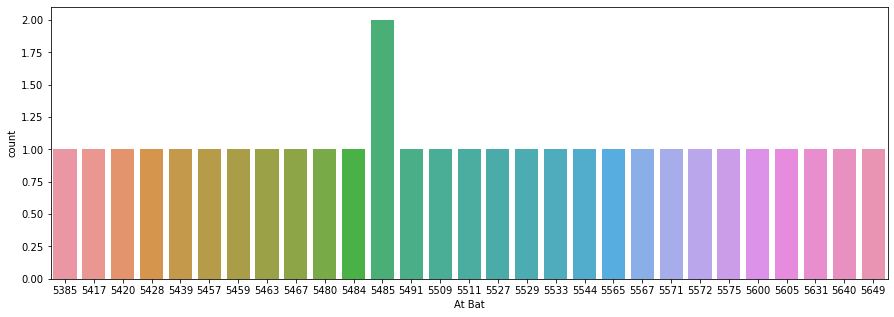

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x='At Bat',data=df)

<AxesSubplot:xlabel='Doubles', ylabel='count'>

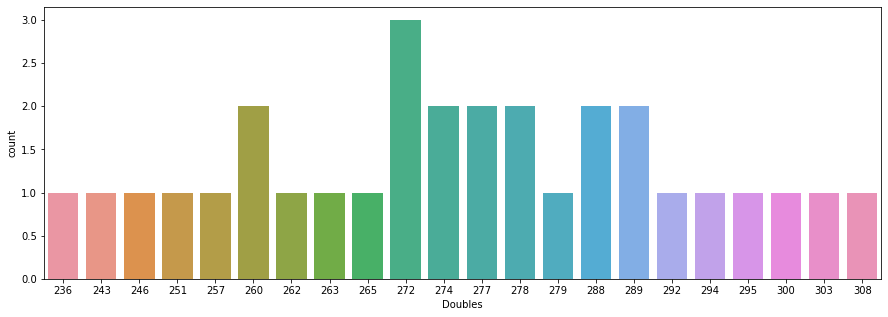

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x='Doubles',data=df)

<AxesSubplot:xlabel='Triples', ylabel='count'>

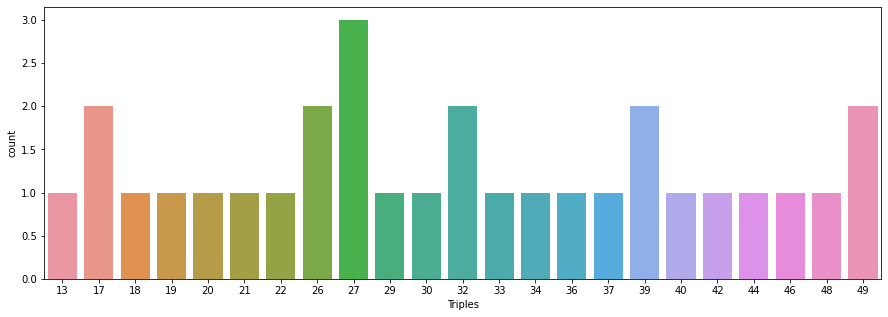

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x='Triples',data=df)

<AxesSubplot:xlabel='Home Runs', ylabel='count'>

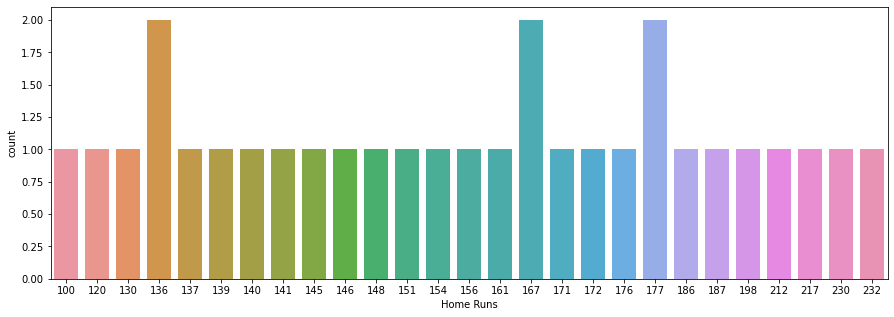

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(x='Home Runs',data=df)

<AxesSubplot:xlabel='Base on Balls', ylabel='count'>

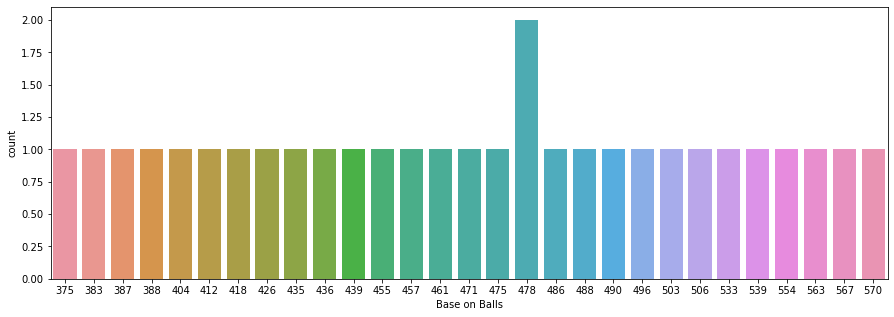

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x='Base on Balls',data=df)

<AxesSubplot:xlabel='Runs Average', ylabel='count'>

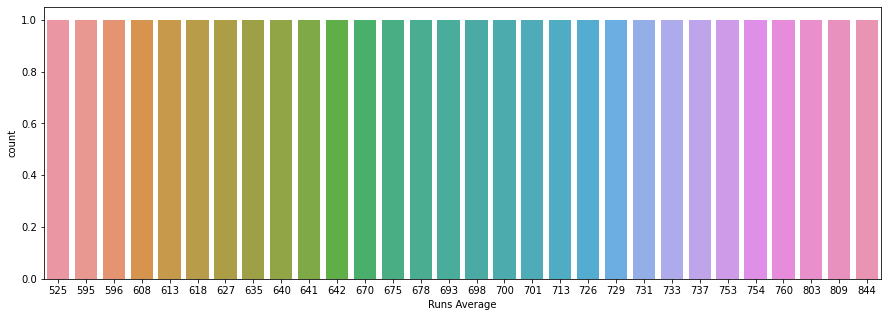

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='Runs Average',data=df)

<AxesSubplot:xlabel='Stolen Base', ylabel='count'>

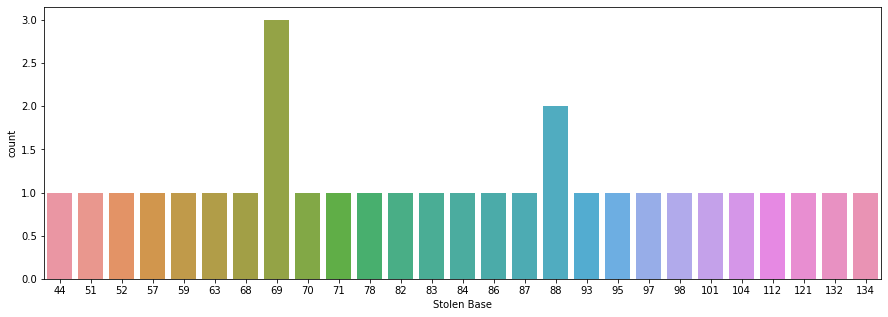

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(x='Stolen Base',data=df)

<AxesSubplot:xlabel='Earned Runs', ylabel='count'>

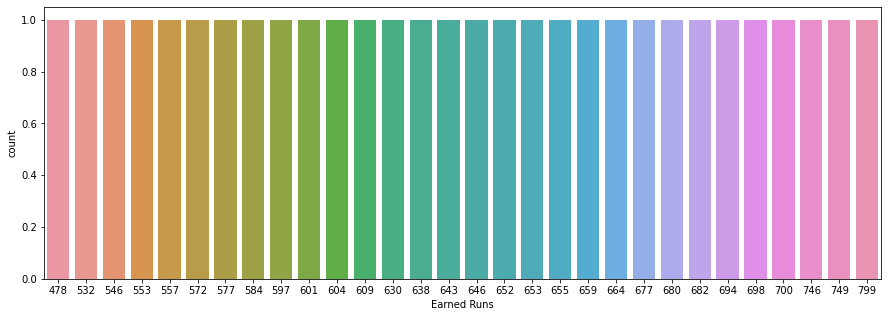

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='Earned Runs',data=df)

<AxesSubplot:xlabel='Earned Run Average', ylabel='count'>

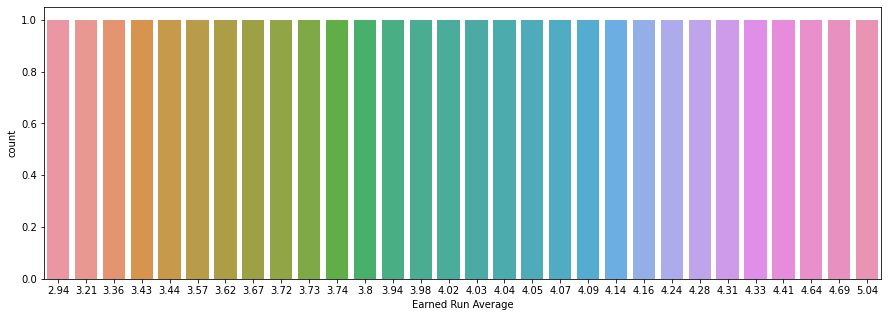

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='Earned Run Average',data=df)

<AxesSubplot:xlabel='Complete Game', ylabel='count'>

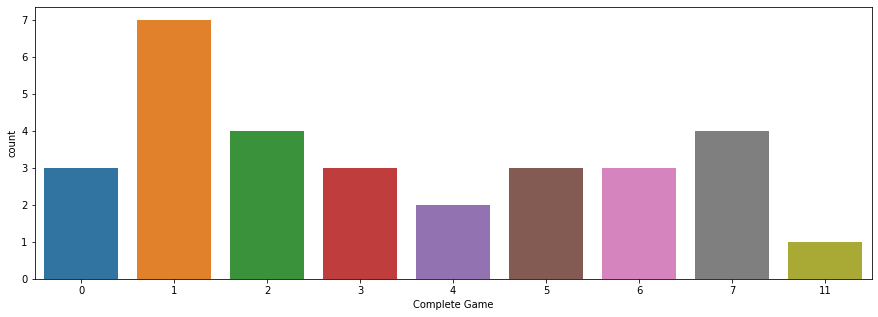

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='Complete Game',data=df)

<AxesSubplot:xlabel='Shut Outs', ylabel='count'>

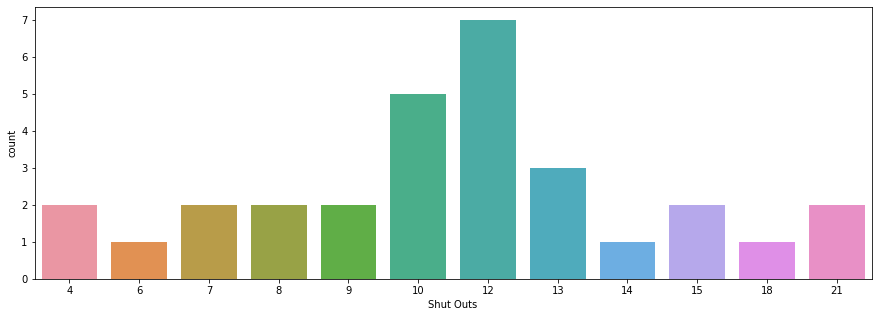

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x='Shut Outs',data=df)

<AxesSubplot:xlabel='Saves', ylabel='count'>

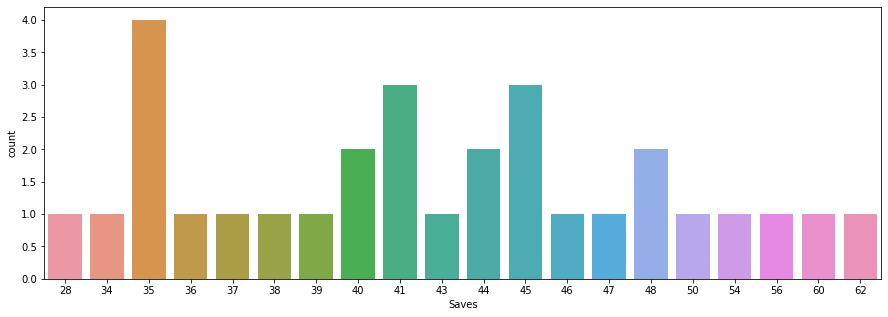

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x='Saves',data=df)

<AxesSubplot:xlabel='Errors', ylabel='count'>

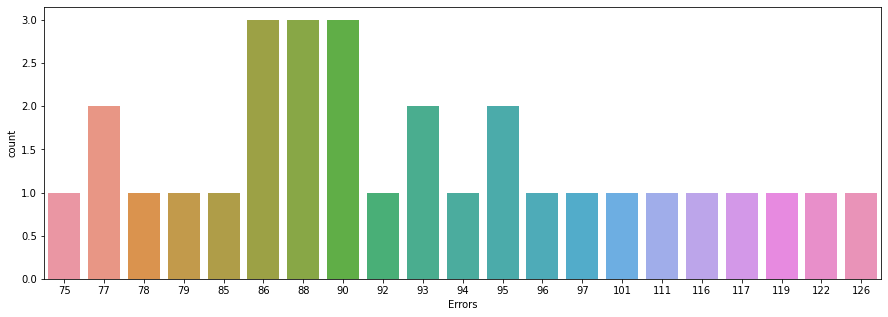

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x='Errors',data=df)

In [36]:
# bivariate ploting

Text(0, 0.5, 'At Bat')

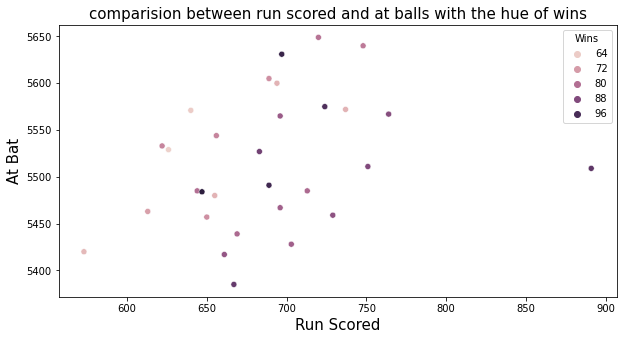

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Runs Scored',y='At Bat',data=df,hue='Wins')
plt.title("comparision between run scored and at balls with the hue of wins",fontsize=15)
plt.xlabel('Run Scored',fontsize=15)
plt.ylabel('At Bat',fontsize=15)

Text(0, 0.5, 'Hits')

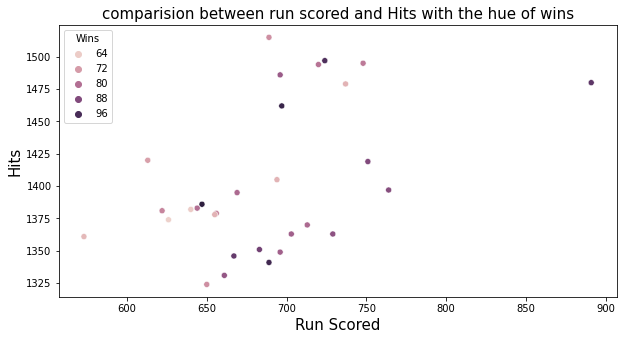

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Runs Scored',y='Hits',data=df,hue='Wins')
plt.title("comparision between run scored and Hits with the hue of wins",fontsize=15)
plt.xlabel('Run Scored',fontsize=15)
plt.ylabel('Hits',fontsize=15)

Text(0, 0.5, 'Home Runs')

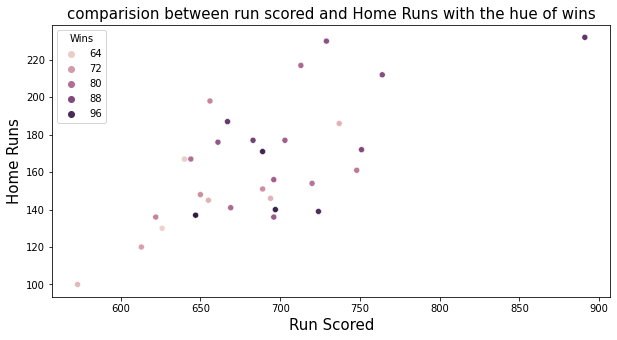

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Runs Scored',y='Home Runs',data=df,hue='Wins')
plt.title("comparision between run scored and Home Runs with the hue of wins",fontsize=15)
plt.xlabel('Run Scored',fontsize=15)
plt.ylabel('Home Runs',fontsize=15)

In [40]:
df.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

Text(0, 0.5, 'Base on Balls')

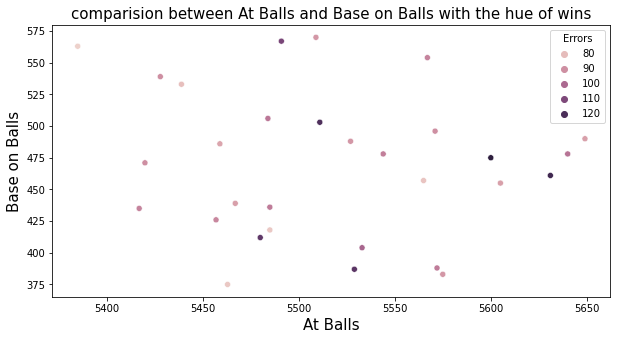

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='At Bat',y='Base on Balls',data=df,hue='Errors')
plt.title("comparision between At Balls and Base on Balls with the hue of wins",fontsize=15)
plt.xlabel('At Balls',fontsize=15)
plt.ylabel('Base on Balls',fontsize=15)

Text(0, 0.5, 'Strike Outs')

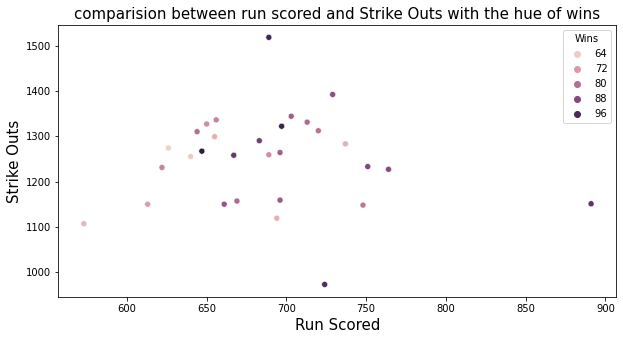

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Runs Scored',y='Strike Outs',data=df,hue='Wins')
plt.title("comparision between run scored and Strike Outs with the hue of wins",fontsize=15)
plt.xlabel('Run Scored',fontsize=15)
plt.ylabel('Strike Outs',fontsize=15)

Text(0, 0.5, 'Runs Average')

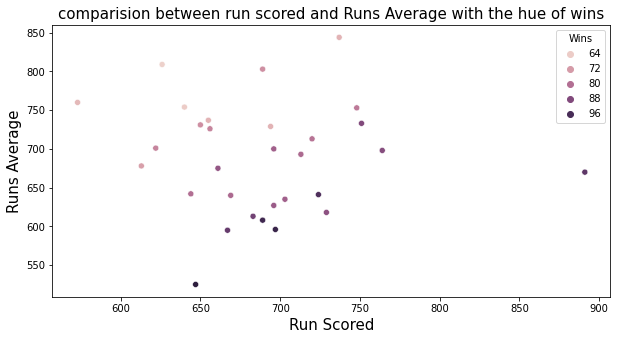

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Runs Scored',y='Runs Average',data=df,hue='Wins')
plt.title("comparision between run scored and Runs Average with the hue of wins",fontsize=15)
plt.xlabel('Run Scored',fontsize=15)
plt.ylabel('Runs Average',fontsize=15)

Text(0, 0.5, 'Earned Runs')

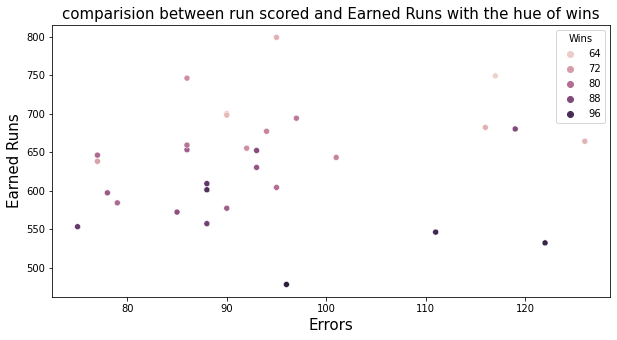

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Errors',y='Earned Runs',data=df,hue='Wins')
plt.title("comparision between run scored and Earned Runs with the hue of wins",fontsize=15)
plt.xlabel('Errors',fontsize=15)
plt.ylabel('Earned Runs',fontsize=15)

Text(0, 0.5, 'Complete Game')

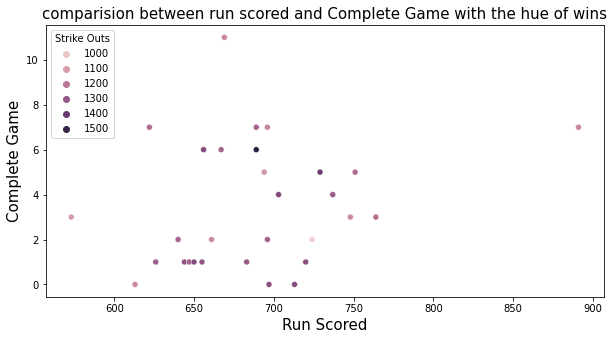

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Runs Scored',y='Complete Game',data=df,hue='Strike Outs')
plt.title("comparision between run scored and Complete Game with the hue of wins",fontsize=15)
plt.xlabel('Run Scored',fontsize=15)
plt.ylabel('Complete Game',fontsize=15)

In [46]:
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [47]:
# multivariavte plot we use pairplot

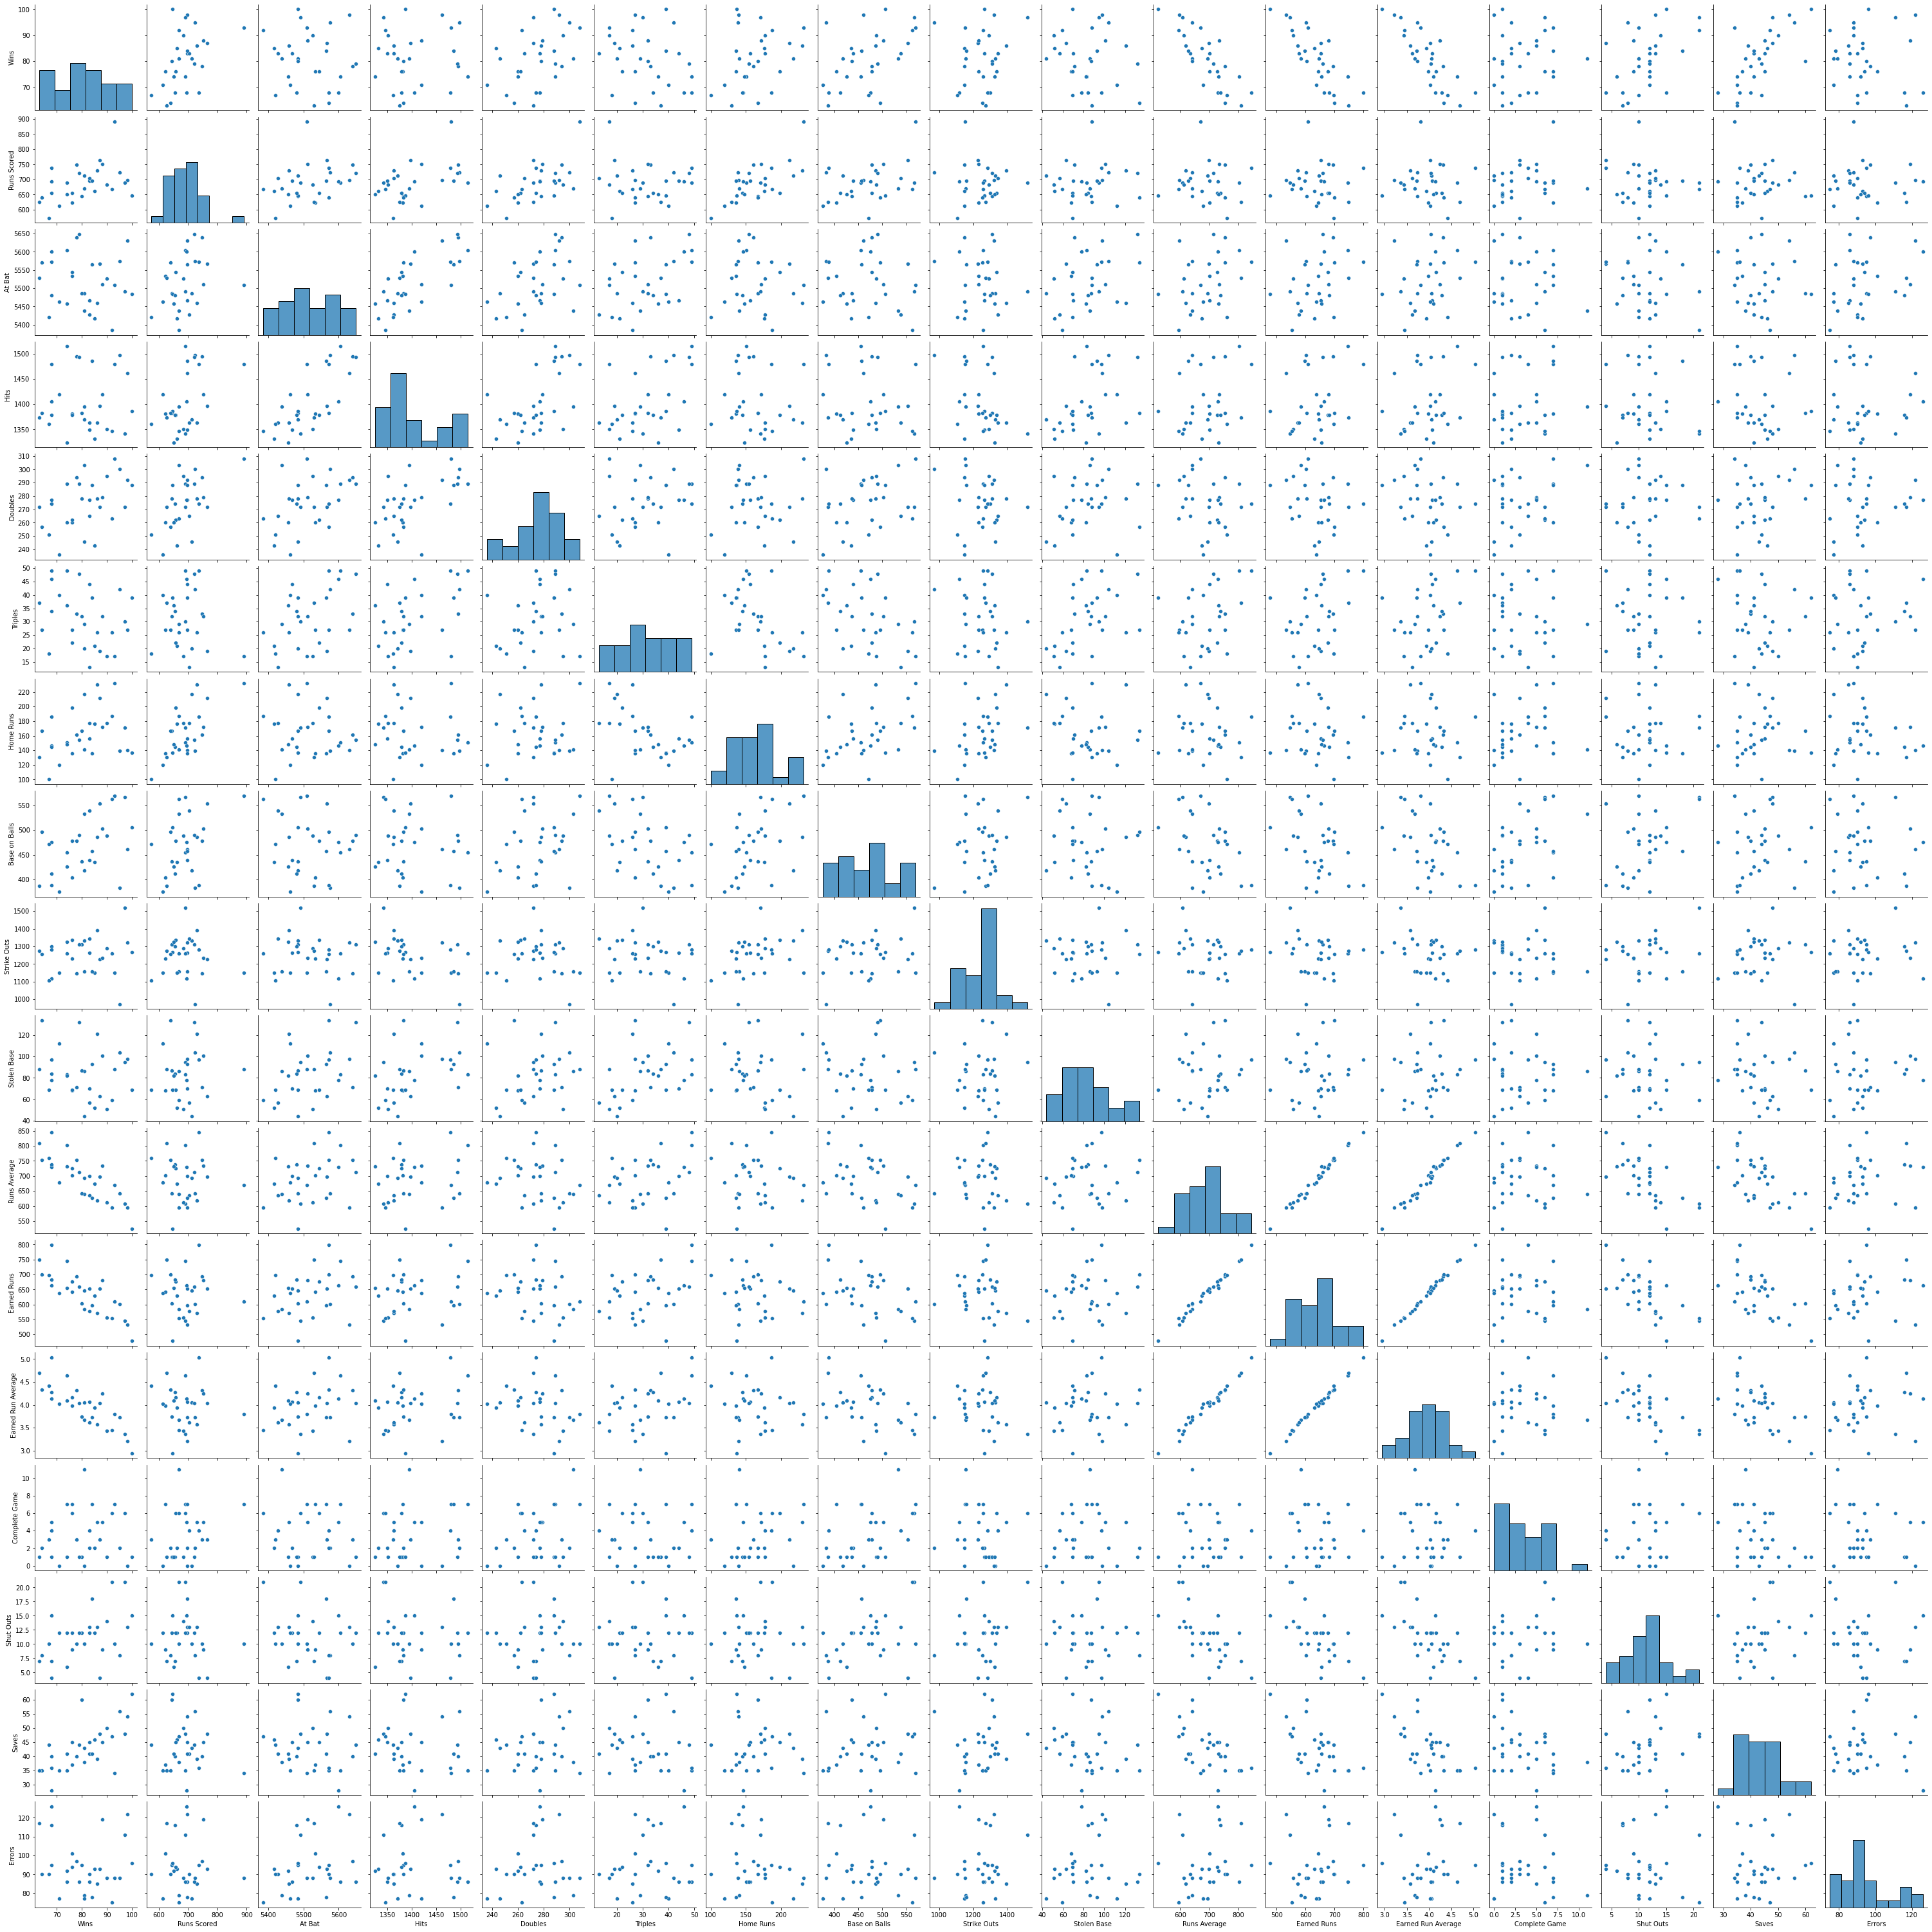

In [48]:
sns.pairplot(df)

Text(0, 0.5, 'Earned Run Average')

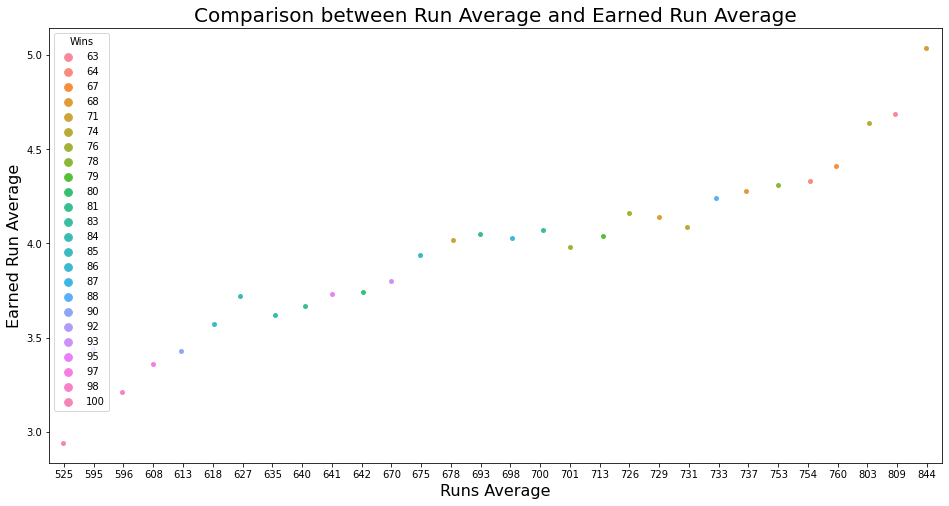

In [49]:
# Checking the relation between two variables
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Earned Run Average', fontsize =20)
sns.stripplot(x='Runs Average',y='Earned Run Average',data=df,hue='Wins')
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Earned Run Average",fontsize =16)

Text(0, 0.5, 'Strike Outs')

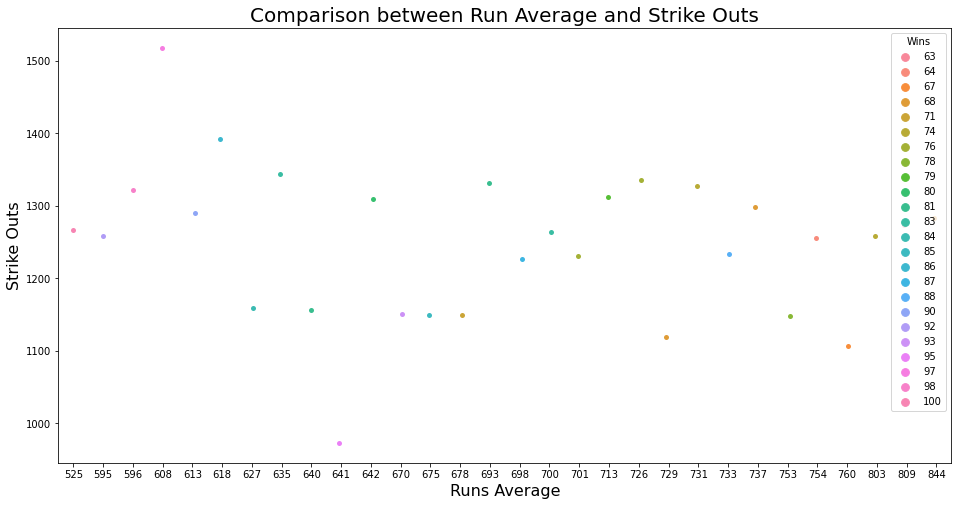

In [50]:
# Checking the relation between two variables
plt.figure(figsize=[16,8])
plt.title('Comparison between Run Average and Strike Outs', fontsize =20)
sns.stripplot(x='Runs Average',y='Strike Outs',data=df,hue='Wins')
plt.xlabel('Runs Average',fontsize =16)
plt.ylabel("Strike Outs",fontsize =16)

### Distribution of the data 

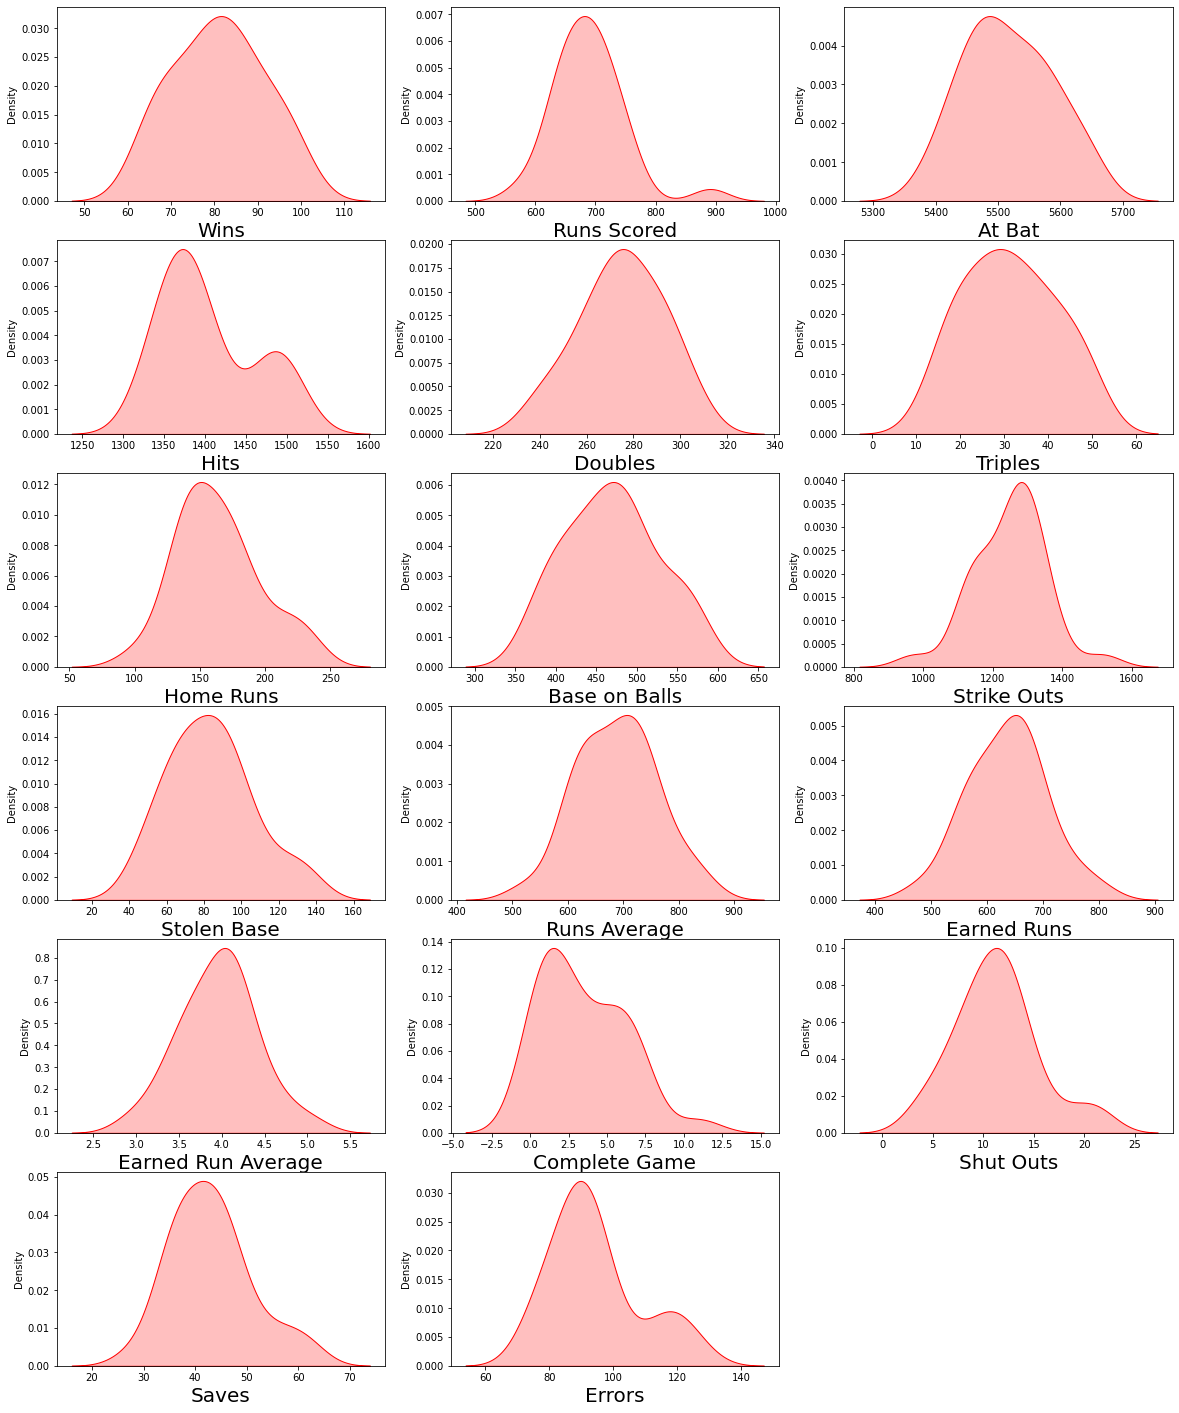

In [51]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        ax=plt.subplot(6,3,p)
        sns.distplot(df[i],color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(i,fontsize=20)
    p +=1

plt.show()

from above we can see that there is good distribution but some of the features are little left and right skewed we can deal with that

###  we can plot the box plot for the outliers 

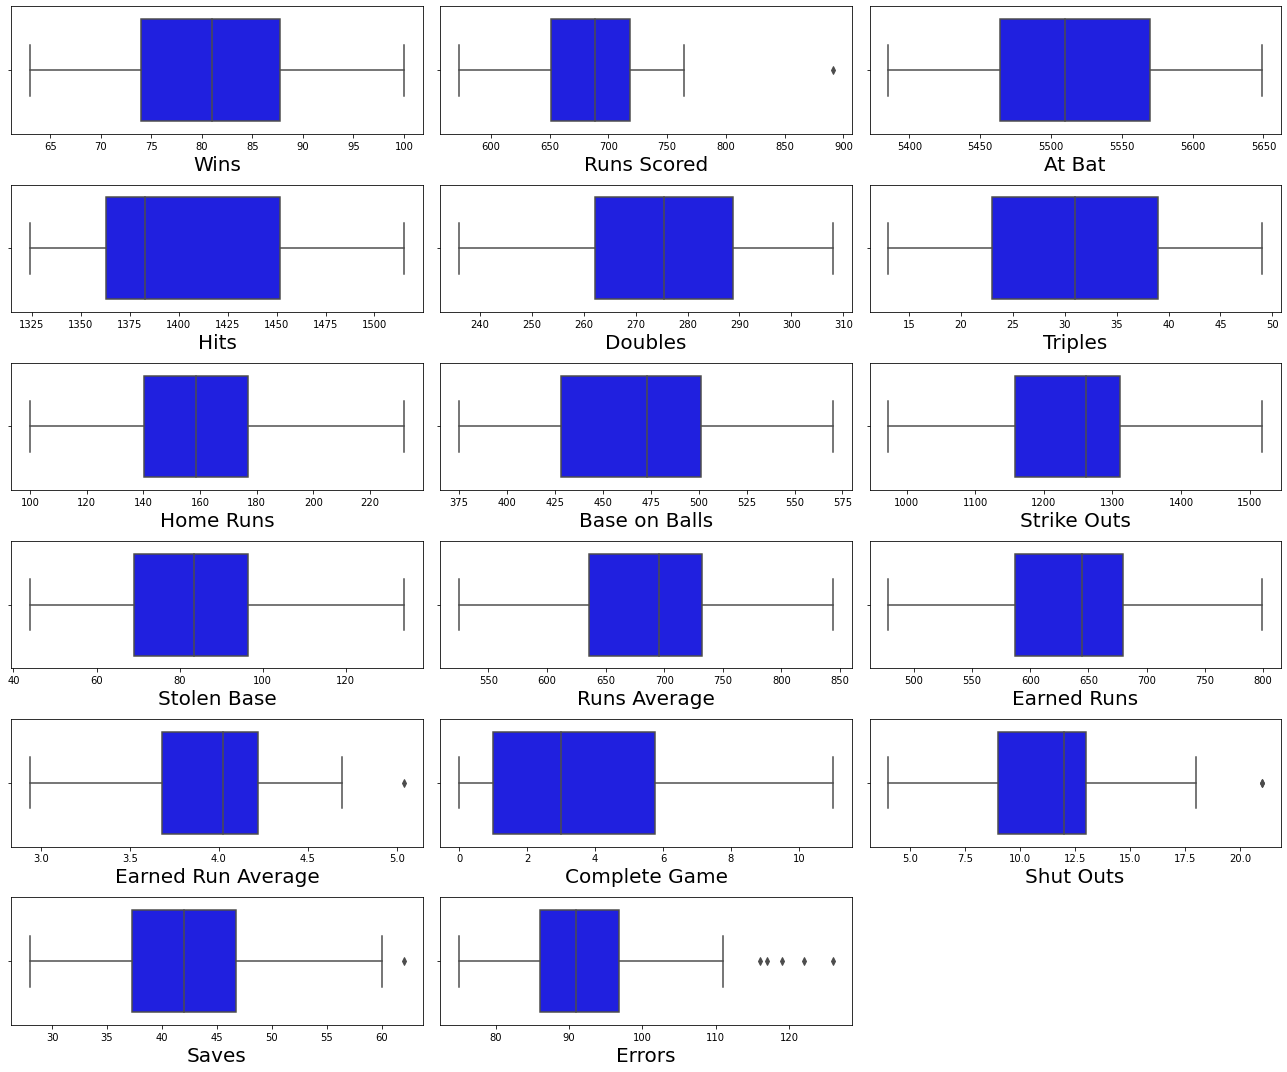

In [52]:
plt.figure(figsize=(18,15), facecolor='white')
p=1
for i in df:
    if p <=17:
        ax = plt.subplot(6,3,p)
        sns.boxplot(df[i], color='blue')
        plt.xlabel(i,fontsize=20)
    p+=1
plt.tight_layout()
plt.show()

as we see from the above observation

1) outliers shut outs are show and errors columns which are normal to be having so we no need to worry about that we can move further 

### outliers removal

we can remove the outliers with the threshold of value 3

In [53]:
from scipy.stats import zscore

In [54]:
z=np.abs(zscore(df))

we can take only the data which is less than the thresshold value which is less than three

In [55]:
df1=df[(z<3).all(axis=1)]

#### now we can check the dataloss percentage

In [56]:
print("data loss percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage 3.3333333333333335


as we see the data loss percentage is minimum so we can move further according this value

In [57]:
# check the shape of the dataset before and after remval of the outliers

In [58]:
print(df.shape)
print(df1.shape)

(30, 17)
(29, 17)


### feature selection and engineering the dataset 

In [59]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

Optimal range for skewness is -0.5 to 0.5.

Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

#### Transforming positive or right skew data using boxcox transformation

In [60]:
from scipy.stats import boxcox

In [61]:
df1['Hits']=boxcox(df1['Hits'],-2)
df1['Shut Outs']=boxcox(df1['Shut Outs'],0.5)
df1['Saves']=boxcox(df1['Saves'],0.5)

### Other feature not able transform by Boxcox Method as they showing data must be positive. So others columns are transfrom using yeo-johnson method

In [62]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [63]:
ec=['Errors','Complete Game']
ds =df1[ec].copy()

In [64]:
column_trans =ColumnTransformer(
    [  ('Errors',PowerTransformer(method='yeo-johnson',standardize=True),['Errors']),
      ('Complete Game',PowerTransformer(method='yeo-johnson',standardize=True),['Complete Game'])])
transformed_yeojohnson =column_trans.fit_transform(df1)   



In [65]:
# check for the data frame

new_cols=['Errors','Complete Game']
dataset=pd.DataFrame(transformed_yeojohnson,columns=new_cols) #to convert numpy array back into dataframe
pd.concat([dataset],axis=1)
dataset.head()

,Errors,Complete Game
0,-0.348265,-0.307098
1,-0.540820,-0.307098
2,-1.326125,2.011315
3,0.650818,1.264463
4,-0.540820,1.264463


In [66]:
# reseting index and mergeing transform data
df1.reset_index(drop=True, inplace=True)
dataset.index=df1.index
df1[ec]=dataset[ec]

In [67]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

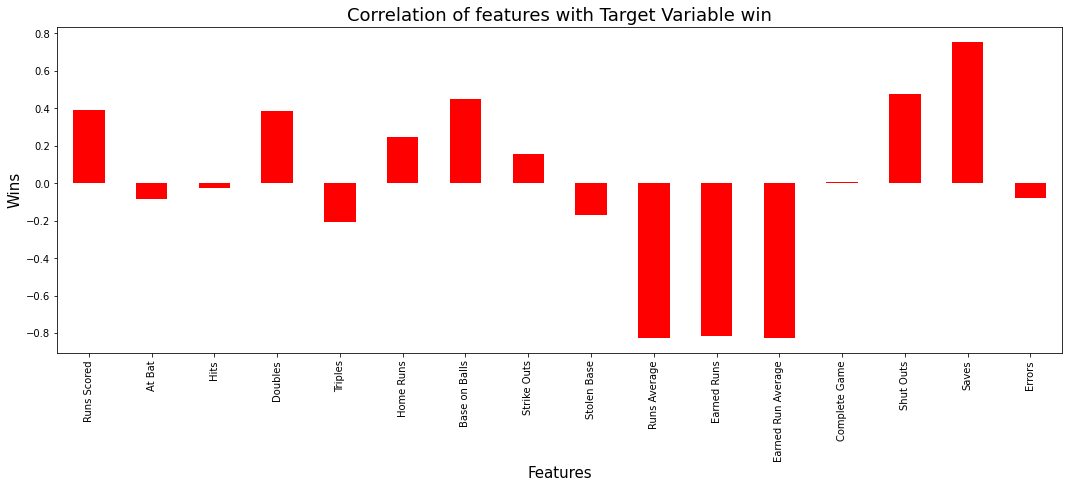

In [68]:
plt.figure(figsize = (18,6))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Wins',fontsize=15)
plt.title('Correlation of features with Target Variable win',fontsize = 18)
plt.show()

Hits, At bats, Complete game and errors are very poorly correlated with target variable.

Saves, ERA,RA,EA are highly correleated with target variable.

here is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average". This need to check.

###  now its time to check the multicolinearty with VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['features']=df1.columns

In [71]:
vif

,vif values,features
0,1241.003534,Wins
1,3248.685492,Runs Scored
2,67999.633336,At Bat
3,61783.303243,Hits
4,1059.348657,Doubles
5,33.888446,Triples
6,249.058062,Home Runs
7,282.902409,Base on Balls
8,414.389674,Strike Outs
9,25.992021,Stolen Base


It is natural to have such high multicollinearity due to following reason :- 
1. Earned Run Average,Earned Runs,Runs Average are highly correlated with each other. 

2. At Bat and Hits are 0.771 correlated with each other. But at same time very poor correlated with target variable. 3. Another most important reason is data need to scale which we did not scale until now.

Strategy to Address Multicollinearity :

Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.

Another way to address Multicollinerity is to Scaled Data and then apply PCA.
We will go by Second way for further investigation.

### Standard Scaling

In [72]:
x=df1.drop(columns =['Wins'])
y=df1['Wins']

In [73]:
print(x.shape)
print(y.shape)

(29, 16)
(29,)


In [74]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [75]:
x

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.692724,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.777436,1.602631,-0.348265
1,0.331147,-0.702831,-0.971360,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.247475,0.255621,-0.540820
2,-0.274666,-1.100253,-0.051994,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.239162,-0.689393,-1.326125
3,-1.329231,0.233951,-0.322098,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.500806,-0.831290,0.650818
4,0.174084,1.255894,1.964604,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.247475,-1.120956,-0.540820
5,1.856900,0.716535,-0.014069,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.113126,0.637942,0.082858
6,0.712585,-0.447345,-0.540156,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.239162,-0.006384,-1.588197
7,-0.835605,-0.447345,-0.283008,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.247475,2.059075,0.237592
8,1.497899,1.752672,1.661908,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.239162,-0.411095,0.383386
9,1.565212,-0.078310,0.392577,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.500806,0.255621,1.554265


### PCA


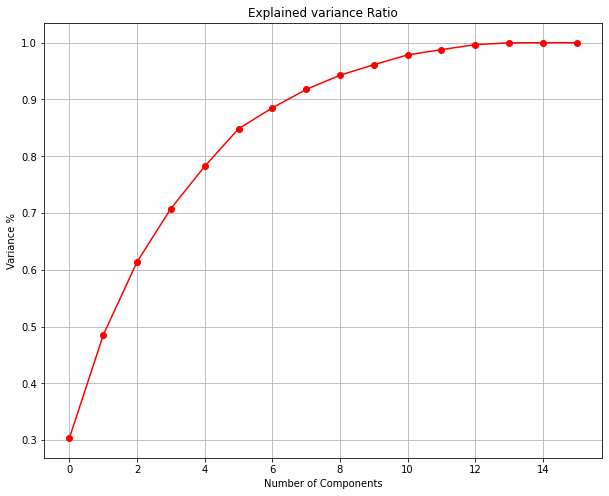

In [76]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Comment -
AS per the graph, we can see that 7 principal components attribute for 95% of variation in the data. We shall pick the first 7 components for our prediction

In [77]:
pca_new = PCA(n_components=7)
x_new = pca_new.fit_transform(x)

In [78]:
principle_x=pd.DataFrame(x_new,columns=np.arange(7))

### checking vif again  

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6


We can see that Multicollinearity issue is clear now.

# Model Building


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklear import neighbors
from math import sqrt

In [81]:
# now we can check on which random state our model will give the maximun accuracy

maxacc=0
maxrs=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(principle_x,y,random_state=i,test_size=0.25)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    acc=r2_score(y_test,lr_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("maximum r2 score is",maxacc,"on the random state is ",maxrs)



maximum r2 score is 0.9495378290957465 on the random state is  283


In [82]:
x_train,x_test,y_train,y_test=train_test_split(principle_x,y,random_state=maxrs,test_size=0.25)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 7)
(8, 7)
(21,)
(8,)


In [84]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
#acc=r2_score(y_test,lr_pred)
print('accuracy score',r2_score(y_test,lr_pred))
print("mean absolute error",mean_absolute_error(y_test,lr_pred))
print("mean squared error",mean_squared_error(y_test,lr_pred))
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,lr_pred,multioutput='variance_weighted'))

print('\033[1m'+'Predicted Wins:'+'\033[0m\n',lr_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',y_test)

accuracy score 0.9495378290957465
mean absolute error 1.9671755086238
mean squared error 5.989228909198587
 R2 Score :
0.9495378290957465
Predicted Wins:
 [99.81858458 65.08903781 87.02987476 72.29663096 62.57703011 82.33930923
 87.99880029 78.15070325]


Actual Wins:
 14    100
28     68
10     86
3      76
23     63
8      78
5      87
12     76
Name: Wins, dtype: int64


In [88]:
from sklearn.model_selection import cross_val_score

In [92]:
# cross validation

score=cross_val_score(lr,principle_x,y,cv=3)
print("\033[1m"+"cross validation score :",lr,":"+"\033[0m\n]")
print("Mean CV Score :",score.mean())

cross validation score : LinearRegression() :
]
Mean CV Score : 0.33546550287090265


###  KNN regressor

In [104]:
rmse_val=[]
for k in range(10):
    k = k+1
    model=neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append(error)
    print("RMSE value for K =", k ,"is", error)

RMSE value for K = 1 is 6.928203230275509
RMSE value for K = 2 is 6.5717197140474575
RMSE value for K = 3 is 6.116916434500858
RMSE value for K = 4 is 5.048205126577168
RMSE value for K = 5 is 5.647565847336357
RMSE value for K = 6 is 5.362550181065391
RMSE value for K = 7 is 6.2021638751885515
RMSE value for K = 8 is 6.325944840496161
RMSE value for K = 9 is 6.689890105945659
RMSE value for K = 10 is 7.485819928371242


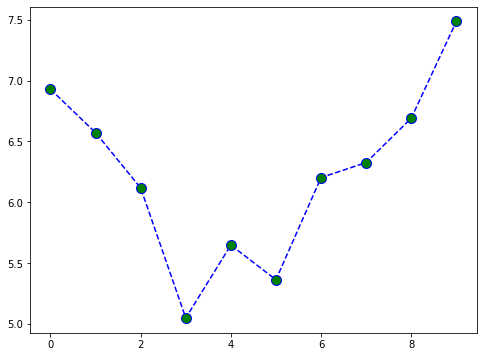

In [105]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k= 3, we get the minimum RMSE value which approximately 6.116916434500858, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case

## Apply other regression model ,evaluation and cross validation

In [123]:
rf=RandomForestRegressor(n_estimators=250,max_depth=6)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("mean squared error :", mean_squared_error(y_test,y_pred))
print("mean absolute error :",mean_absolute_error(y_test,y_pred))
print("r2 score",r2_score(y_test,y_pred))

mean squared error : 30.4918420364966
mean absolute error : 4.815315476190474
r2 score 0.7430913783128248


In [124]:
score = cross_val_score(rf, principle_x, y, cv =4)
print('\n')
print('\033[1m'+'Cross Validation Score :',rf,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor(max_depth=6, n_estimators=250) :

Mean CV Score : 0.2555503134458389


### we can make for loop for all the regression model 

In [140]:
svr=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='mse')
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor( max_depth=6,learning_rate=0.1)
knn=KNeighborsRegressor(n_neighbors=4,algorithm='kd_tree')
ls= Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
rd=Ridge(alpha=1e-2, normalize=True)
#xgb=XGBRegressor()
model = [ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,y_pred)) 
    
    # Cross Validation
    score = cross_val_score(m, principle_x, y, cv =4)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



 Error of  Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :
Mean absolute error : 1.8876211418726037
Mean squared error : 5.628332198655928
Root Mean Squared Error: 2.372410630277973


 R2 Score :
0.9525785596743049


Cross Validation Score : Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :

Mean CV Score : 0.6710873546839929


 Error of  Ridge(alpha=0.01, normalize=True) :
Mean absolute error : 1.919220802657395
Mean squared error : 5.753544878609551
Root Mean Squared Error: 2.39865480605475


 R2 Score :
0.9515235818547905


Cross Validation Score : Ridge(alpha=0.01, normalize=True) :

Mean CV Score : 0.6706084407569657


 Error of  SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error : 3.299231629217376
Mean squared error : 12.703506642588147
Root Mean Squared Error: 3.564197896103434


 R2 Score :
0.892966768677509


Cross Validation Score : SVR(epsilon=0.2, gamma='auto', kernel='poly') :

Mean CV Score : 0.4844810448311648


 Error of  DecisionTreeRegr

#### we can see that Lasso Regression gives maximum R2 score of 95%. So we will apply Hyperparameter tuning on Lasso Regression

###  we can plot the models




 True Values Vs Predicted Value plot RandomForestRegressor(max_depth=6, n_estimators=250) :


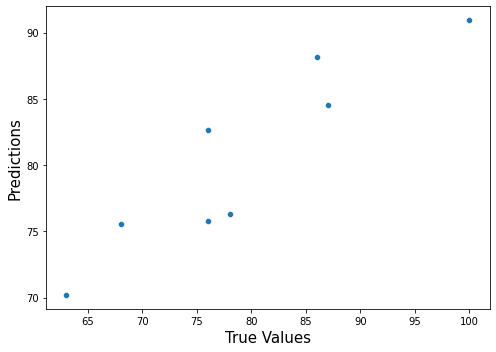





 True Values Vs Predicted Value plot Lasso(alpha=0.01, max_iter=100000.0, normalize=True) :


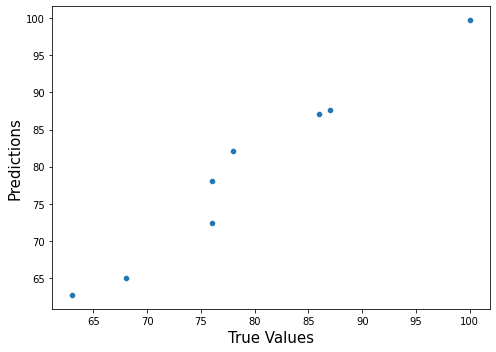





 True Values Vs Predicted Value plot Ridge(alpha=0.01, normalize=True) :


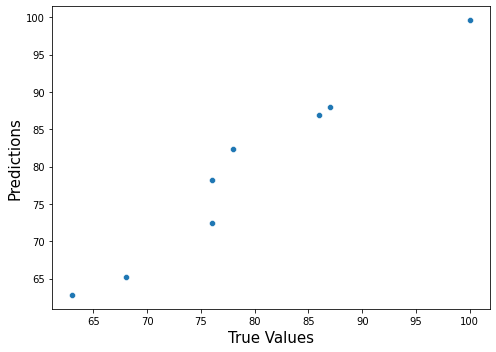





 True Values Vs Predicted Value plot SVR(epsilon=0.2, gamma='auto', kernel='poly') :


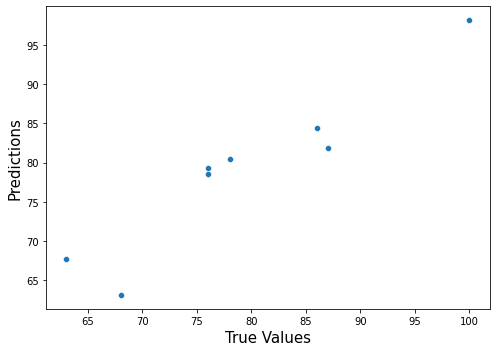





 True Values Vs Predicted Value plot DecisionTreeRegressor(criterion='mse') :


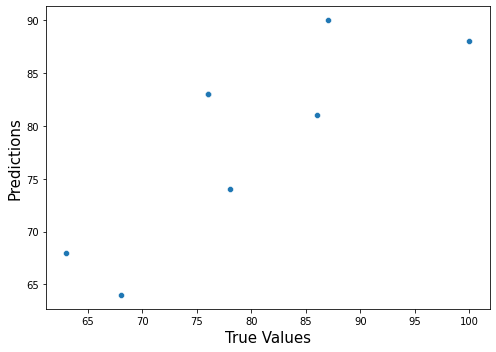





 True Values Vs Predicted Value plot AdaBoostRegressor(learning_rate=0.1) :


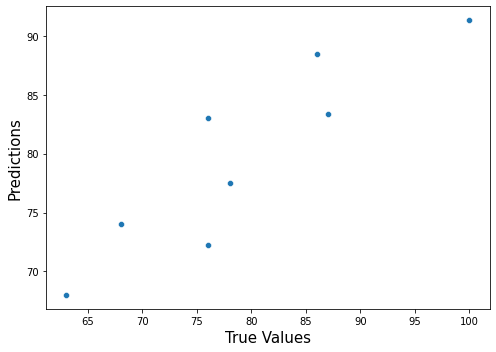





 True Values Vs Predicted Value plot GradientBoostingRegressor(max_depth=6) :


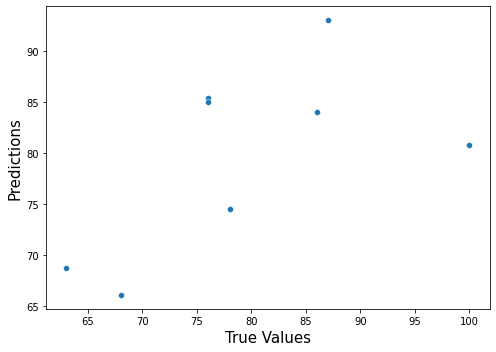





 True Values Vs Predicted Value plot KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4) :


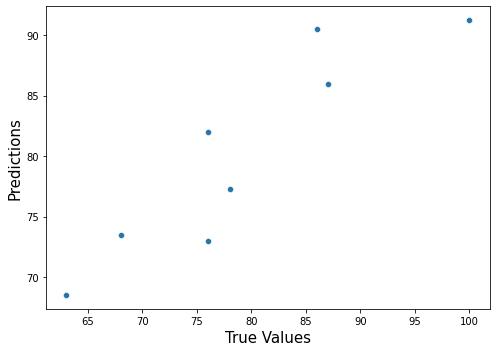

In [143]:
model = [rf,ls,rd,svr,dtc,adb,gradb,knn]

for m in model:
    plt.figure(figsize=(7,5))
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\n')
    print('\033[1m'+' True Values Vs Predicted Value plot', m, ':' +'\033[0m')
    sns.scatterplot(y_test.round(2), y_pred)
    plt.xlabel('True Values' , fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.tight_layout()
    plt.show()
    print('\n')
    print('===================================================================================================')

## Hyper Parameter Tuning : GridSearchCV

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
parameter = {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
             'fit_intercept': [True,False],'normalize':[True,False],
             'max_iter':[250,500,1000,1500],'random_state':np.arange(100),
             'selection':["cyclic","random"]}

In [147]:
gcv=GridSearchCV(Lasso(),parameter,cv=5,n_jobs=-1,verbose=3)

In [148]:
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 19200 candidates, totalling 96000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'normalize': [True, False],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [149]:
gcv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'normalize': True,
 'random_state': 41,
 'selection': 'random'}

# Final Model 

In [150]:
Final_mod = Lasso(alpha = 0.5, fit_intercept= True, normalize = False,
                                           max_iter = 250, random_state = 32,selection ='random')
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 1.8817253476920541
Mean squared error : 4.934982950849337
Root Mean Squared Error: 2.2214821518187664


 R2 Score of Final Model :
0.9584203648164353




 True Values Vs Predicted Value plot :


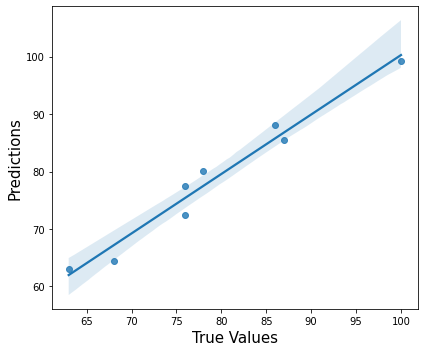

In [158]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(x_test)
sns.regplot(y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Saving Model 

In [159]:
import joblib
joblib.dump(Final_mod,'baseball_final.pkl')

['baseball_final.pkl']